In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Barents = pd.read_excel(filepath, sheet_name='Barents-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Barents)
fp.date_time(Barents)

,Extent,Date
0,1107873.946,1979-01-01
1,1211101.473,1979-02-01
2,1215128.770,1979-03-01
3,1233940.811,1979-04-01
4,1193061.566,1979-05-01
...,...,...
533,124025.343,2023-06-01
534,53107.426,2023-07-01
535,11242.827,2023-08-01
536,3272.024,2023-09-01


In [5]:
scaler = MinMaxScaler()
Barents['Extent'] = scaler.fit_transform(Barents['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 2
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [8]:
extent = Barents['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((525, 12, 1), (525,))

In [9]:
X_train, y_train = X[:420], y[:420]
X_val, y_val = X[420:472], y[420:472]
X_test, y_test = X[472:], y[472:]

In [10]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [11]:
cp = ModelCheckpoint('Barents_model_LT2/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [12]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
47/53 [=========================>....] - ETA: 0s - loss: 0.2275 - root_mean_squared_error: 0.4770

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 9s 109ms/step - loss: 0.2154 - root_mean_squared_error: 0.4641 - val_loss: 0.0634 - val_root_mean_squared_error: 0.2519
Epoch 2/50
49/53 [==========================>...] - ETA: 0s - loss: 0.1587 - root_mean_squared_error: 0.3984

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 5s 103ms/step - loss: 0.1573 - root_mean_squared_error: 0.3966 - val_loss: 0.0497 - val_root_mean_squared_error: 0.2230
Epoch 3/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1181 - root_mean_squared_error: 0.3437

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 6s 110ms/step - loss: 0.1176 - root_mean_squared_error: 0.3429 - val_loss: 0.0402 - val_root_mean_squared_error: 0.2005
Epoch 4/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0936 - root_mean_squared_error: 0.3060

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.0913 - root_mean_squared_error: 0.3022 - val_loss: 0.0338 - val_root_mean_squared_error: 0.1839
Epoch 5/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0689 - root_mean_squared_error: 0.2625

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 5s 98ms/step - loss: 0.0682 - root_mean_squared_error: 0.2611 - val_loss: 0.0299 - val_root_mean_squared_error: 0.1728
Epoch 6/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0519 - root_mean_squared_error: 0.2279

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0509 - root_mean_squared_error: 0.2255 - val_loss: 0.0280 - val_root_mean_squared_error: 0.1674
Epoch 7/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0392 - root_mean_squared_error: 0.1981

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 3s 65ms/step - loss: 0.0387 - root_mean_squared_error: 0.1968 - val_loss: 0.0260 - val_root_mean_squared_error: 0.1612
Epoch 8/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0311 - root_mean_squared_error: 0.1764

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.0326 - root_mean_squared_error: 0.1806 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1570
Epoch 9/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0268 - root_mean_squared_error: 0.1638

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 4s 69ms/step - loss: 0.0268 - root_mean_squared_error: 0.1636 - val_loss: 0.0234 - val_root_mean_squared_error: 0.1529
Epoch 10/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0225 - root_mean_squared_error: 0.1501

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 4s 72ms/step - loss: 0.0228 - root_mean_squared_error: 0.1511 - val_loss: 0.0201 - val_root_mean_squared_error: 0.1417
Epoch 11/50
42/53 [======================>.......] - ETA: 0s - loss: 0.0238 - root_mean_squared_error: 0.1542

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 3s 66ms/step - loss: 0.0217 - root_mean_squared_error: 0.1474 - val_loss: 0.0149 - val_root_mean_squared_error: 0.1219
Epoch 12/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0183 - root_mean_squared_error: 0.1353

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 4s 71ms/step - loss: 0.0186 - root_mean_squared_error: 0.1364 - val_loss: 0.0124 - val_root_mean_squared_error: 0.1112
Epoch 13/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0210 - root_mean_squared_error: 0.1449

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.0212 - root_mean_squared_error: 0.1456 - val_loss: 0.0110 - val_root_mean_squared_error: 0.1047
Epoch 14/50
44/53 [=======================>......] - ETA: 0s - loss: 0.0164 - root_mean_squared_error: 0.1282

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 4s 77ms/step - loss: 0.0172 - root_mean_squared_error: 0.1310 - val_loss: 0.0096 - val_root_mean_squared_error: 0.0981
Epoch 15/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0158 - root_mean_squared_error: 0.1258

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 5s 102ms/step - loss: 0.0173 - root_mean_squared_error: 0.1315 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0914
Epoch 16/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0183 - root_mean_squared_error: 0.1352

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 5s 91ms/step - loss: 0.0186 - root_mean_squared_error: 0.1362 - val_loss: 0.0083 - val_root_mean_squared_error: 0.0912
Epoch 17/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0167 - root_mean_squared_error: 0.1291

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 5s 93ms/step - loss: 0.0171 - root_mean_squared_error: 0.1308 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0901
Epoch 18/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0166 - root_mean_squared_error: 0.1287

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.0165 - root_mean_squared_error: 0.1286 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0897
Epoch 19/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0151 - root_mean_squared_error: 0.1227

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.0163 - root_mean_squared_error: 0.1277 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0886
Epoch 20/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0127 - root_mean_squared_error: 0.1126 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0886
Epoch 21/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0179 - root_mean_squared_error: 0.1337 - val_loss: 0.0081 - val_root_mean_squared_error: 0.0903
Epoch 22/50
51/53 [===========================>..] - ETA: 0s - loss: 0.0154 - root_mean_squared_error: 0.1242

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.0153 - root_mean_squared_error: 0.1236 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0885
Epoch 23/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0177 - root_mean_squared_error: 0.1330 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0904
Epoch 24/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0155 - root_mean_squared_error: 0.1246 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0893
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0166 - root_mean_squared_error: 0.1289 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0889
Epoch 26/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0145 - root_mean_squared_error: 0.1204 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0893
Epoch 27/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0161 - root_mean_squared_error: 0.1268 - val_loss: 0.0080 - val_root_mean_squared

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 5s 95ms/step - loss: 0.0159 - root_mean_squared_error: 0.1262 - val_loss: 0.0074 - val_root_mean_squared_error: 0.0860
Epoch 32/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0173 - root_mean_squared_error: 0.1314 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0888
Epoch 33/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0148 - root_mean_squared_error: 0.1215 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0865
Epoch 34/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0140 - root_mean_squared_error: 0.1182 - val_loss: 0.0082 - val_root_mean_squared_error: 0.0904
Epoch 35/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0154 - root_mean_squared_error: 0.1243 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0921
Epoch 36/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0160 - root_mean_squared_error: 0.1265 - val_loss: 0.0076 - val_root_mean_squared

INFO:tensorflow:Assets written to: Barents_model_LT2\assets


INFO:tensorflow:Assets written to: Barents_model_LT2\assets


53/53 [==============================] - 5s 90ms/step - loss: 0.0163 - root_mean_squared_error: 0.1275 - val_loss: 0.0073 - val_root_mean_squared_error: 0.0853
Epoch 40/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0142 - root_mean_squared_error: 0.1190 - val_loss: 0.0078 - val_root_mean_squared_error: 0.0881
Epoch 41/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0152 - root_mean_squared_error: 0.1231 - val_loss: 0.0085 - val_root_mean_squared_error: 0.0921
Epoch 42/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0164 - root_mean_squared_error: 0.1282 - val_loss: 0.0080 - val_root_mean_squared_error: 0.0892
Epoch 43/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0079 - val_root_mean_squared_error: 0.0888
Epoch 44/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0161 - root_mean_squared_error: 0.1267 - val_loss: 0.0087 - val_root_mean_squared

In [13]:
time = (etime - stime)/60
print(f'{time} minutes')

1.9319191892941794 minutes


In [14]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

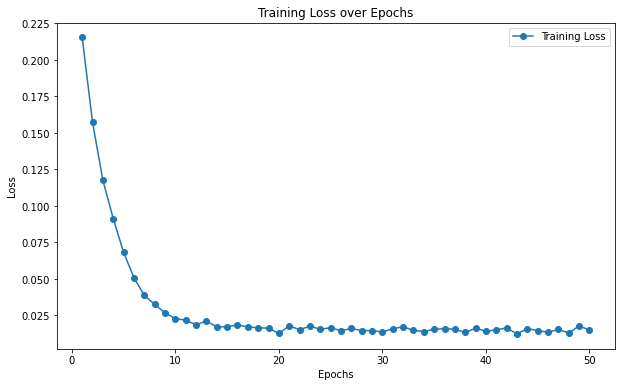

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

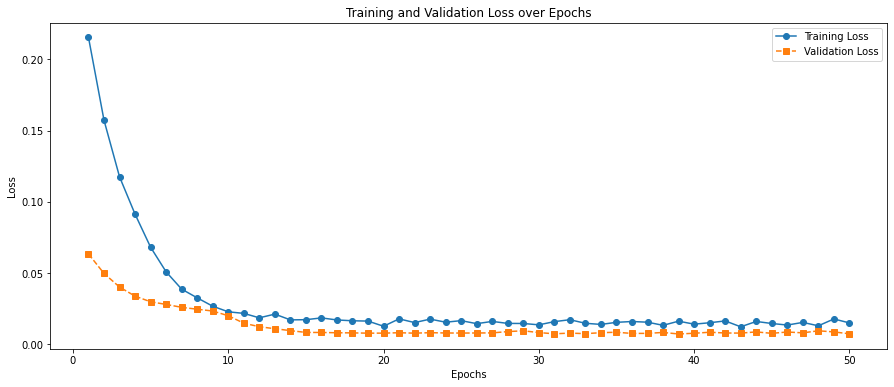

In [16]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [17]:
from tensorflow.keras.models import load_model
model1 = load_model('Barents_model_LT2/')

In [18]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 2ms/step


In [19]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.07812391484996532
MAE : 0.06414334844125509


In [20]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [21]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,176398.750000,265975.112
1,-291.757446,112300.019
2,-43957.648438,44787.893
3,-24623.673828,14909.156
4,64097.421875,54595.378
5,200845.171875,242829.930
6,308422.687500,406860.687
7,533565.812500,605897.837
8,594599.375000,654073.790
9,694293.375000,701143.910


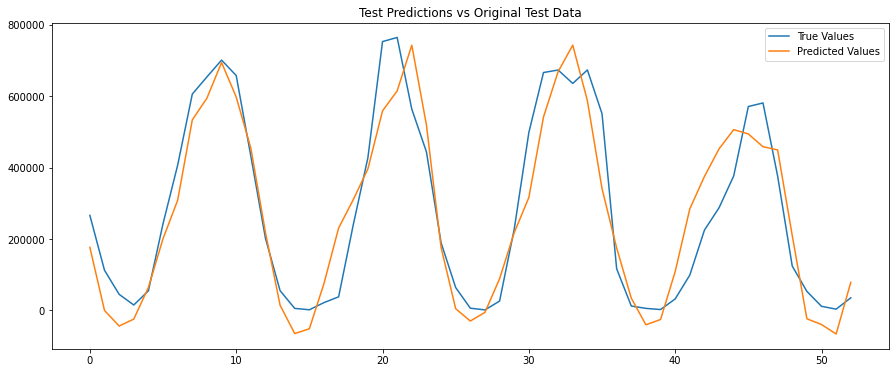

In [22]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [23]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 4ms/step


In [26]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

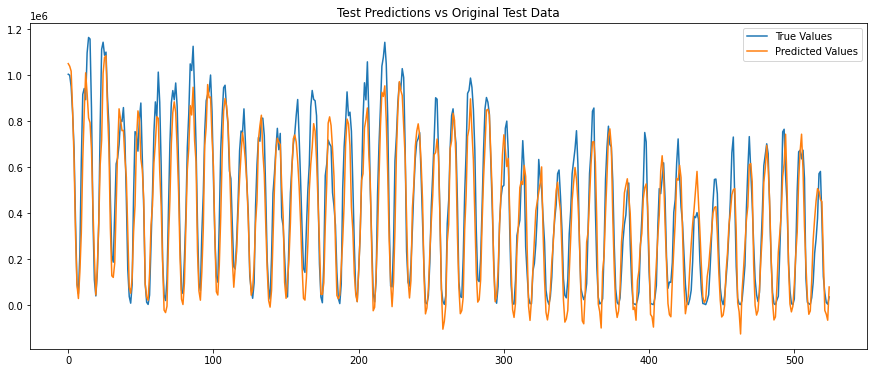

In [27]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()